# Linear regression on quicksort

In [1]:
%matplotlib inline
import pandas
import numpy as np
import matplotlib.pyplot as plt
import statsmodels.api as sm
import statsmodels.formula.api as smf

## Retrieve and plot data

In [2]:
data = pandas.read_csv("measurements_03_47_wide.csv")

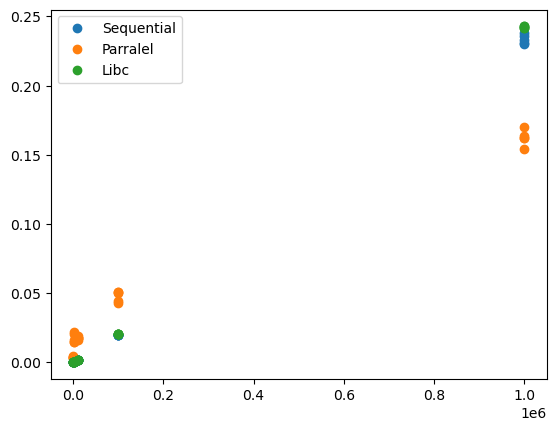

In [3]:
plt.plot(data['Size'], data.drop('Size', axis=1), 'o', label=['Sequential', 'Parralel', 'Libc'])
plt.legend()

## Linear Regressions Model

Let's first fit linear models.

In [4]:
modelseq = smf.ols('Seq ~ Size', data=data).fit()
modelpar = smf.ols('Par ~ Size', data=data).fit()
modelgnu = smf.ols('Libc ~ Size', data=data).fit()

Then we can have interesting insights and visualization on it !

In [5]:
modelseq.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    Seq   R-squared:                       1.000
Model:                            OLS   Adj. R-squared:                  1.000
Method:                 Least Squares   F-statistic:                 5.281e+04
Date:                Thu, 23 Nov 2023   Prob (F-statistic):           3.65e-40
Time:                        17:06:41   Log-Likelihood:                 121.04
No. Observations:                  25   AIC:                            -238.1
Df Residuals:                      23   BIC:                            -235.6
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     -0.0010      0.000     -2.217      0.037      -0.002   -6.78e-05
Size        2.343e-07   1.02e-09    229.807      0.000    2.32e-07    2.36e-07
==============================================================================
Omnibus:                        0.730   Durbin-Watson:                   0.862
Prob(Omnibus):                  0.694   Jarque-Bera (JB):                0.102
Skew:                           0.115   Prob(JB):                        0.951
Kurtosis:                       3.211   Cond. No.                     5.17e+05
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 5.17e+05. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [6]:
modelpar.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    Par   R-squared:                       0.971
Model:                            OLS   Adj. R-squared:                  0.970
Method:                 Least Squares   F-statistic:                     778.6
Date:                Thu, 23 Nov 2023   Prob (F-statistic):           3.07e-19
Time:                        17:06:41   Log-Likelihood:                 80.021
No. Observations:                  25   AIC:                            -156.0
Df Residuals:                      23   BIC:                            -153.6
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      0.0172      0.002      7.263      0.000       0.012       0.022
Size        1.468e-07   5.26e-09     27.904      0.000    1.36e-07    1.58e-07
==============================================================================
Omnibus:                        1.061   Durbin-Watson:                   0.584
Prob(Omnibus):                  0.588   Jarque-Bera (JB):                1.024
Skew:                           0.406   Prob(JB):                        0.599
Kurtosis:                       2.431   Cond. No.                     5.17e+05
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 5.17e+05. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [7]:
modelgnu.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                   Libc   R-squared:                       1.000
Model:                            OLS   Adj. R-squared:                  1.000
Method:                 Least Squares   F-statistic:                 9.671e+04
Date:                Thu, 23 Nov 2023   Prob (F-statistic):           3.49e-43
Time:                        17:06:41   Log-Likelihood:                 127.68
No. Observations:                  25   AIC:                            -251.4
Df Residuals:                      23   BIC:                            -248.9
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     -0.0011      0.000     -3.120      0.005      -0.002      -0.000
Size        2.431e-07   7.82e-10    310.976      0.000    2.41e-07    2.45e-07
==============================================================================
Omnibus:                        7.073   Durbin-Watson:                   0.586
Prob(Omnibus):                  0.029   Jarque-Bera (JB):                6.397
Skew:                          -1.237   Prob(JB):                       0.0408
Kurtosis:                       2.844   Cond. No.                     5.17e+05
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 5.17e+05. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

/opt/conda/lib/python3.11/site-packages/statsmodels/graphics/regressionplots.py:430: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  fig = abline_plot(0, fitted_line.params[0], color='k', ax=ax)


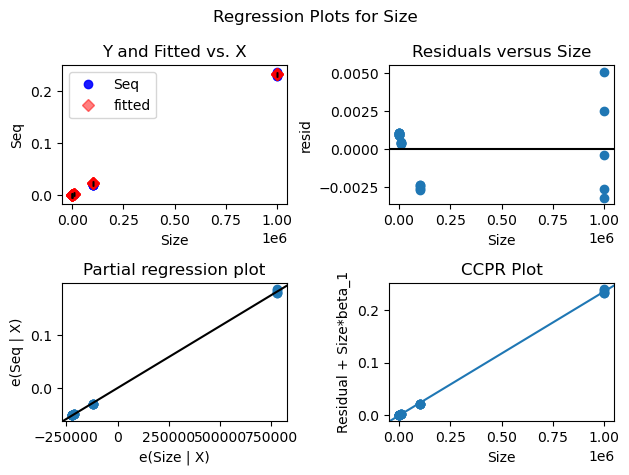

In [8]:
fig = sm.graphics.plot_regress_exog(modelseq, "Size")
fig.tight_layout()

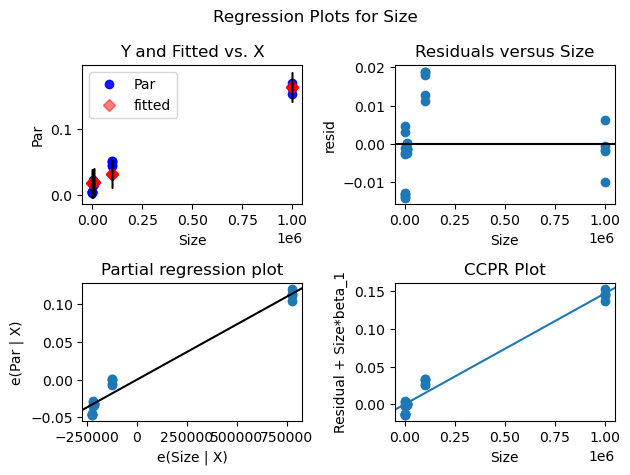

In [9]:
fig = sm.graphics.plot_regress_exog(modelpar, "Size")
fig.tight_layout()

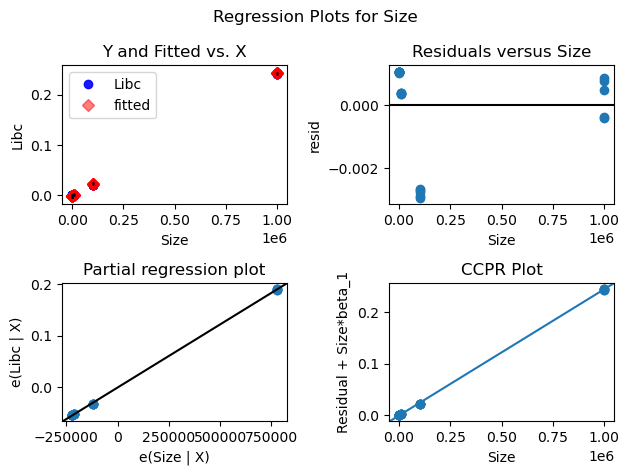

In [10]:
fig = sm.graphics.plot_regress_exog(modelgnu, "Size")
fig.tight_layout()

## Complexity models

We can try to fit on nlog(n)

In [11]:
data['Sizelog'] = data['Size']*np.log(data['Size'])
modelseqlog = smf.ols('Seq ~ Sizelog', data=data).fit()
modelparlog = smf.ols('Par ~ Sizelog', data=data).fit()
modelgnulog = smf.ols('Libc ~ Sizelog', data=data).fit()

In [12]:
modelseqlog.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    Seq   R-squared:                       1.000
Model:                            OLS   Adj. R-squared:                  1.000
Method:                 Least Squares   F-statistic:                 9.685e+04
Date:                Thu, 23 Nov 2023   Prob (F-statistic):           3.43e-43
Time:                        17:06:44   Log-Likelihood:                 128.61
No. Observations:                  25   AIC:                            -253.2
Df Residuals:                      23   BIC:                            -250.8
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      0.0001      0.000      0.418      0.680      -0.001       0.001
Sizelog      1.69e-08   5.43e-11    311.206      0.000    1.68e-08     1.7e-08
==============================================================================
Omnibus:                       13.550   Durbin-Watson:                   1.622
Prob(Omnibus):                  0.001   Jarque-Bera (JB):               26.527
Skew:                           0.746   Prob(JB):                     1.74e-06
Kurtosis:                       7.821   Cond. No.                     7.09e+06
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 7.09e+06. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [13]:
modelparlog.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    Par   R-squared:                       0.967
Model:                            OLS   Adj. R-squared:                  0.965
Method:                 Least Squares   F-statistic:                     664.9
Date:                Thu, 23 Nov 2023   Prob (F-statistic):           1.78e-18
Time:                        17:06:44   Log-Likelihood:                 78.109
No. Observations:                  25   AIC:                            -152.2
Df Residuals:                      23   BIC:                            -149.8
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      0.0180      0.003      7.082      0.000       0.013       0.023
Sizelog     1.056e-08   4.09e-10     25.786      0.000    9.71e-09    1.14e-08
==============================================================================
Omnibus:                        1.439   Durbin-Watson:                   0.550
Prob(Omnibus):                  0.487   Jarque-Bera (JB):                1.298
Skew:                           0.495   Prob(JB):                        0.523
Kurtosis:                       2.484   Cond. No.                     7.09e+06
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 7.09e+06. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [14]:
modelgnulog.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                   Libc   R-squared:                       1.000
Model:                            OLS   Adj. R-squared:                  1.000
Method:                 Least Squares   F-statistic:                 2.920e+06
Date:                Thu, 23 Nov 2023   Prob (F-statistic):           3.34e-60
Time:                        17:06:44   Log-Likelihood:                 170.27
No. Observations:                  25   AIC:                            -336.5
Df Residuals:                      23   BIC:                            -334.1
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      0.0001   6.36e-05      1.619      0.119   -2.86e-05       0.000
Sizelog     1.753e-08   1.03e-11   1708.924      0.000    1.75e-08    1.76e-08
==============================================================================
Omnibus:                        6.559   Durbin-Watson:                   3.262
Prob(Omnibus):                  0.038   Jarque-Bera (JB):                5.546
Skew:                          -0.554   Prob(JB):                       0.0625
Kurtosis:                       5.024   Cond. No.                     7.09e+06
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 7.09e+06. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

/opt/conda/lib/python3.11/site-packages/statsmodels/graphics/regressionplots.py:430: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  fig = abline_plot(0, fitted_line.params[0], color='k', ax=ax)


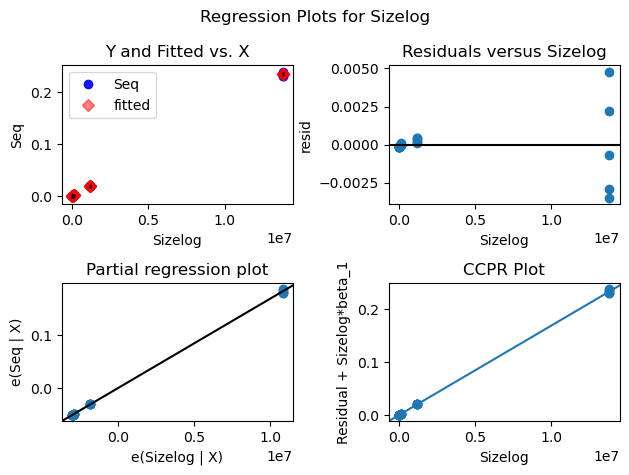

In [16]:
fig = sm.graphics.plot_regress_exog(modelseqlog, "Sizelog")
fig.tight_layout()

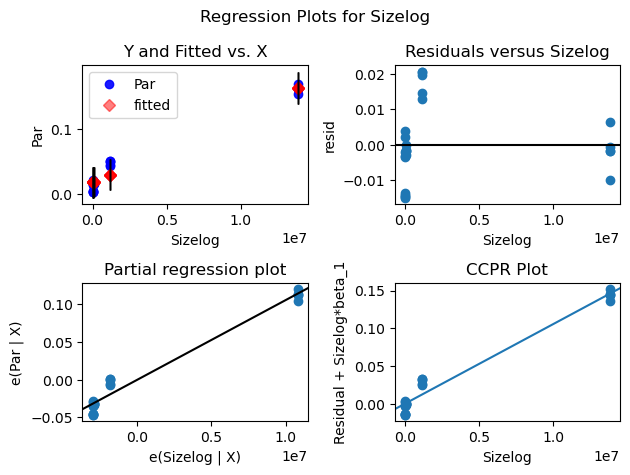

In [17]:
fig = sm.graphics.plot_regress_exog(modelparlog, "Sizelog")
fig.tight_layout()

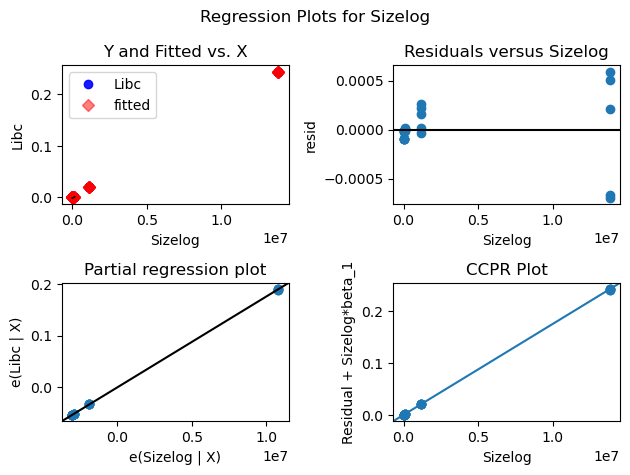

In [18]:
fig = sm.graphics.plot_regress_exog(modelgnulog, "Sizelog")
fig.tight_layout()